### Importando bibliotecas e dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import folium
from folium.plugins import HeatMap
from folium import plugins
import seaborn as sns
import numpy as np

In [ ]:
acidentes_poa = pd.read_csv('https://dadosabertos.poa.br/dataset/d6cfbe48-ee1f-450f-87f5-9426f6a09328/resource/b56f8123-716a-4893-9348-23945f1ea1b9/download/cat_acidentes.csv', sep=';')
#puxando diretamente do site, o banco de dados fica sempre atualizado
acidentes_poa.drop(['data_extracao', 'idacidente' ], axis=1, inplace=True) #limpando o dataframe

acidentes_poa['data'] = pd.to_datetime(acidentes_poa['data']) #passando para formato de data
acidentes_poa['horario'] = pd.to_datetime(acidentes_poa['hora']).dt.time

acidentes_poa['hora'] = pd.to_datetime(acidentes_poa['hora']).dt.hour

acidentes_poa['ano'] = pd.DatetimeIndex(acidentes_poa['data']).year
acidentes_poa['mes'] = pd.DatetimeIndex(acidentes_poa['data']).month



acidentes_poa.head()

,longitude,latitude,log1,log2,predial1,tipo_acid,queda_arr,data,dia_sem,hora,feridos,feridos_gr,mortes,morte_post,fatais,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,outro,noite_dia,regiao,cont_vit,ups,consorcio,horario,ano,mes
0,NaN,NaN,R MARCOS MOREIRA,R GASTON ENGLERT,0,ABALROAMENTO,0,2020-10-17,SÁBADO,19.0,1,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,NOITE,NORTE,1,5,NaN,19:00:00,2020,10
1,-51.146812,-30.151813,R ENG OSCAR DE OLIVEIRA RAMOS,NaN,4141,ABALROAMENTO,0,2015-01-02,SEXTA-FEIRA,23.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,NOITE,SUL,1,5,NaN,23:35:00,2015,1
2,-51.232759,-30.037344,NaN,NaN,0,EVENTUAL,0,2015-01-02,SEXTA-FEIRA,13.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,DIA,CENTRO,0,1,NaN,13:15:00,2015,1
3,-51.214493,-30.026976,R SANTO ANTONIO,NaN,215,COLISÃO,0,2015-01-05,SEGUNDA-FEIRA,17.0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,DIA,CENTRO,0,1,NaN,17:02:00,2015,1
4,-51.185210,-30.036497,R CARAZINHO,NaN,741,ABALROAMENTO,0,2015-01-04,DOMINGO,8.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,DIA,NORTE,1,5,NaN,08:00:00,2015,1


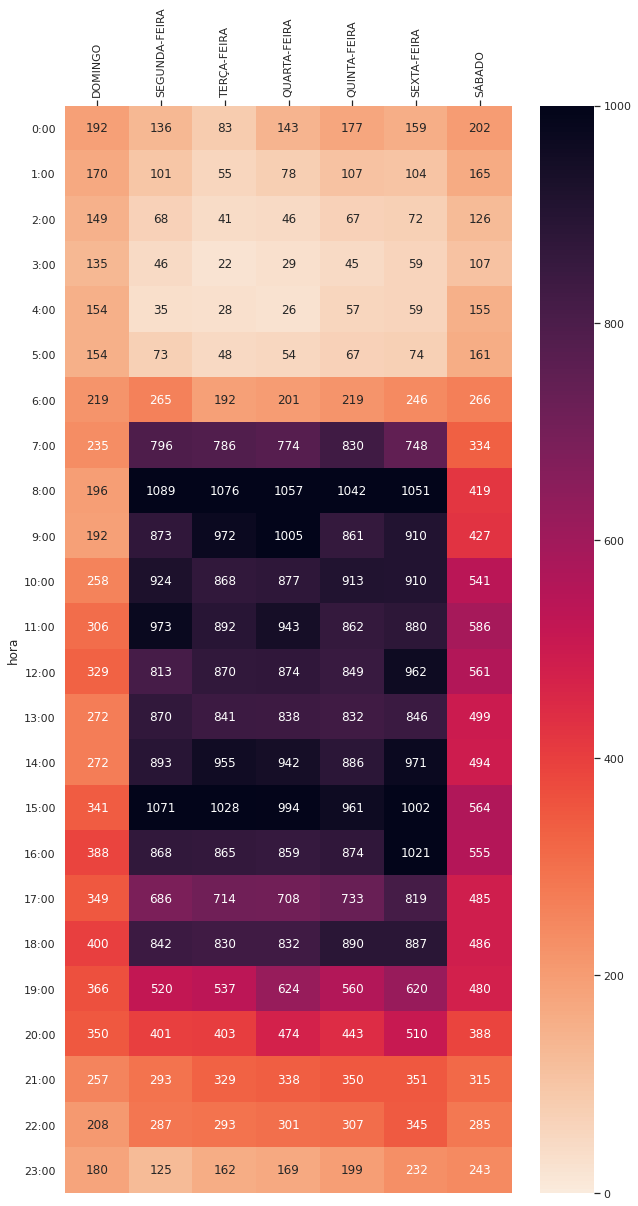

In [ ]:

acidentes_poa_hora = pd.pivot_table(acidentes_poa, index=['hora'],aggfunc='count', columns=['dia_sem'], values=['tipo_acid']).reset_index()
acidentes_poa_hora.columns = acidentes_poa_hora.columns.droplevel()
acidentes_poa_hora = acidentes_poa_hora[['', 'DOMINGO','SEGUNDA-FEIRA', 'TERÇA-FEIRA', 'QUARTA-FEIRA',
                                         'QUINTA-FEIRA', 'SEXTA-FEIRA', 'SÁBADO']]

acidentes_poa_hora.columns = ['hora', 'DOMINGO','SEGUNDA-FEIRA', 'TERÇA-FEIRA', 'QUARTA-FEIRA',
                                         'QUINTA-FEIRA', 'SEXTA-FEIRA', 'SÁBADO']

label = ['DOMINGO','SEGUNDA-FEIRA', 'TERÇA-FEIRA', 'QUARTA-FEIRA',
                                         'QUINTA-FEIRA', 'SEXTA-FEIRA', 'SÁBADO']

acidentes_poa_hora['hora'] = acidentes_poa_hora['hora'].map('{:,.0f}'.format)

hora = []

for i in acidentes_poa_hora['hora']:
  hora.append(str(i) + ':00')
acidentes_poa_hora['hora'] = hora

acidentes_poa_hora.set_index('hora', inplace=True)
sns.set(rc={'figure.figsize':(10,20)})


ax = sns.heatmap(acidentes_poa_hora, annot=True, fmt='.0f', cmap='rocket_r', vmin=0, vmax = 1000 )
plt.yticks(rotation=0)
plt.savefig('acidentes_hora.png', dpi=150)

ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.set_xticklabels(labels = label, rotation = 90)
plt.show()

### Analisando com gráficos

In [ ]:
#novo DataFrame para analisar com gráfico
acidentes_poa_ano = pd.pivot_table(acidentes_poa, index=['mes'],aggfunc='count', columns=['ano'], values=['auto']) 
acidentes_poa_ano

auto                                       
ano    2015    2016    2017    2018    2019   2020
mes                                               
1    1389.0  1118.0   895.0   916.0   961.0  931.0
2    1746.0   931.0   817.0   762.0   968.0  945.0
3    2182.0  1275.0  1132.0  1042.0  1029.0  904.0
4    1463.0  1198.0  1054.0   950.0  1035.0  378.0
5    2119.0  1217.0  1124.0   960.0  1112.0  612.0
6    1987.0  1251.0  1026.0  1069.0  1027.0  617.0
7    1899.0  1208.0  1130.0  1013.0  1093.0  636.0
8    2006.0  1203.0  1260.0  1155.0  1184.0  753.0
9    1718.0  1016.0  1006.0  1054.0  1148.0  781.0
10   1393.0  1140.0  1089.0  1084.0  1319.0  865.0
11   1770.0  1118.0  1090.0  1077.0  1185.0  671.0
12   1529.0  1125.0  1047.0  1072.0  1072.0    NaN

In [ ]:
acidentes_poa_ano_reshape = acidentes_poa_ano.stack().reset_index() #reshape do DataFrame pq eu prefiro
acidentes_poa_ano_reshape.columns=['mes','ano','acidentes']
acidentes_poa_ano_reshape.head()

,mes,ano,acidentes
0,1,2015,1389.0
1,1,2016,1118.0
2,1,2017,895.0
3,1,2018,916.0
4,1,2019,961.0


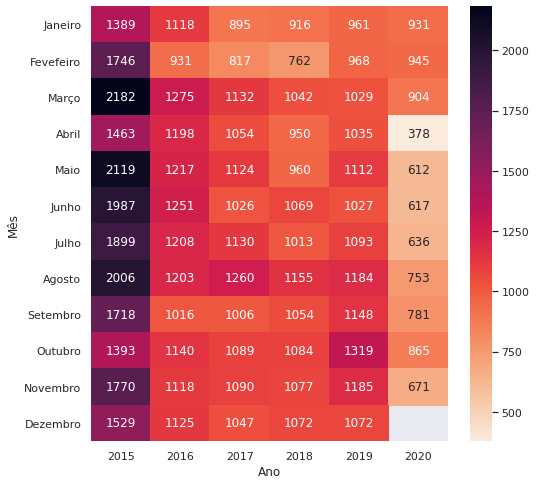

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
x_axis_labels = [2015, 2016, 2017, 2018, 2019, 2020] # labels for x-axis
y_axis_labels = ['Janeiro','Fevefeiro', 'Março',"Abril",'Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'] # labels for y-axis

ax = sns.heatmap(acidentes_poa_ano, annot=True, fmt='.0f', cmap='rocket_r', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.set_xlabel('Ano')
ax.set_ylabel('Mês')
plt.savefig('acidentes_ano.png', dpi=150)

### Fazendo o mapa de calor dos acidentes na cidade de Porto Alegre

#### com a biblioteca Folium

In [ ]:
stationArr = acidentes_poa[['latitude', 'longitude']].dropna().to_numpy()

In [ ]:
SR = folium.Map(
    location=[-30.051409, -51.190261],    # Coordenadas retiradas do Google Maps
    zoom_start=13.3
)

SR.add_child(plugins.HeatMap(stationArr, radius=12))
SR
#referência https://medium.com/@brunocabral_30726/mapeando-dados-reais-utilizando-pandas-e-folium-37938e301049

In [ ]:
SR.save('mapa acidentes poa.html') #exportar como html para usar em algum outro projeto

In [ ]:
data

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
col_0,,,,,,,
00:00,55,56,67,60,60,62,45
01:00,51,65,70,65,60,59,40
02:00,47,76,67,68,61,63,51
03:00,51,71,62,72,53,73,58
04:00,41,63,59,64,68,63,61
05:00,37,61,73,64,68,68,49
06:00,58,67,63,81,58,53,39
07:00,39,62,76,48,56,78,48
08:00,52,46,61,64,63,61,50
